In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print(f"TensorFlow version: {tf.__version__}")
print(f"Eager execution: {tf.executing_eagerly()}")

TensorFlow version: 2.2.0
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)

print(f"Local copy of the dataset file: {train_dataset_fp}")

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [5]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [6]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print(f"Features: {feature_names}")
print(f"Label: {label_name}")

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [7]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [8]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

In [9]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.1, 6.9, 5.8, 4.8, 6.2, 7.3, 6.3, 5. , 5.6, 4.9, 5.1, 5.4, 6.2,
       6.1, 7.7, 4.9, 6.5, 5. , 5.1, 6.7, 5. , 5.7, 6.5, 5.1, 5. , 4.9,
       5.8, 4.6, 5.7, 5.8, 7.2, 5.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.9, 3.2, 2.7, 3.4, 3.4, 2.9, 2.3, 3.6, 2.5, 3.1, 2.5, 3.9, 2.2,
       2.6, 2.8, 3.1, 3. , 3.5, 3.7, 3. , 3.4, 3.8, 3.2, 3.8, 3.3, 2.4,
       2.8, 3.2, 2.9, 2.7, 3.6, 3. ], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.7, 5.7, 5.1, 1.6, 5.4, 6.3, 4.4, 1.4, 3.9, 1.5, 3. , 1.7, 4.5,
       5.6, 6.7, 1.5, 5.5, 1.3, 1.5, 5. , 1.5, 1.7, 5.1, 1.5, 1.4, 3.3,
       5.1, 1.4, 4.2, 4.1, 6.1, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.4, 2.3, 1.9, 0.2, 2.3, 1.8, 1.3, 0.2, 1.1, 0.1, 1.1, 0.4, 1.5,
       1.4, 2. , 0.1, 1.8, 0.3, 0.4, 1.7, 0.2, 0.3, 2. , 0.3,

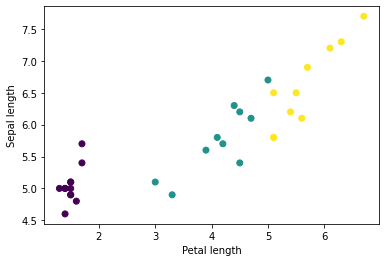

In [10]:
plt.scatter(
    features['petal_length'],
    features['sepal_length'],
    c=labels,
    cmap='viridis'
)

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [11]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [12]:
train_dataset = train_dataset.map(pack_features_vector)

In [13]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[7.2 3.2 6.  1.8]
 [6.5 3.2 5.1 2. ]
 [6.9 3.1 4.9 1.5]
 [5.1 2.5 3.  1.1]
 [6.3 3.3 4.7 1.6]], shape=(5, 4), dtype=float32)


In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)                             
])

In [15]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 4.4014077 , -0.23729485,  4.448287  ],
       [ 4.025831  , -0.2011476 ,  4.056695  ],
       [ 4.118359  , -0.09904225,  3.990005  ],
       [ 3.0026867 ,  0.02036699,  2.78832   ],
       [ 3.8142893 , -0.08102252,  3.7677348 ]], dtype=float32)>

In [16]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.4859876 , 0.00469962, 0.5093128 ],
       [0.48877254, 0.00713433, 0.5040931 ],
       [0.5279054 , 0.00777968, 0.4643149 ],
       [0.53829205, 0.02727802, 0.43442988],
       [0.5063677 , 0.01029802, 0.4833343 ]], dtype=float32)>

In [17]:
print(f"Prediction: {tf.argmax(predictions, axis=1)}")
print(f"    Labels: {labels}")

Prediction: [2 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 0 2 2 2 2]
    Labels: [2 2 1 1 1 2 0 0 2 0 1 1 0 1 1 0 2 0 1 1 0 1 2 2 0 1 2 1 2 1 1 2]


In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

In [20]:
l = loss(model, features, labels, training=False)
print(f"Loss test: {l}")

Loss test: 2.2624635696411133


In [21]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [22]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print(f"Step: {optimizer.iterations.numpy()}, Initial Loss: {loss_value.numpy()}")

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print(f"Step: {optimizer.iterations.numpy()},         Loss: {loss(model, features, labels, training=True).numpy()}")


Step: 0, Initial Loss: 2.2624635696411133
Step: 1,         Loss: 2.0191946029663086


In [24]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  for x, y in train_dataset:
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    epoch_loss_avg.update_state(loss_value)

    epoch_accuracy.update_state(y, model(x, training=True))
  
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print(f"Epoch {epoch}: Loss: {epoch_loss_avg.result():.3f}, Accuracy: {epoch_accuracy.result():.3%}")

Epoch 0: Loss: 1.415, Accuracy: 70.000%
Epoch 50: Loss: 0.368, Accuracy: 93.333%
Epoch 100: Loss: 0.203, Accuracy: 97.500%
Epoch 150: Loss: 0.153, Accuracy: 99.167%
Epoch 200: Loss: 0.112, Accuracy: 98.333%


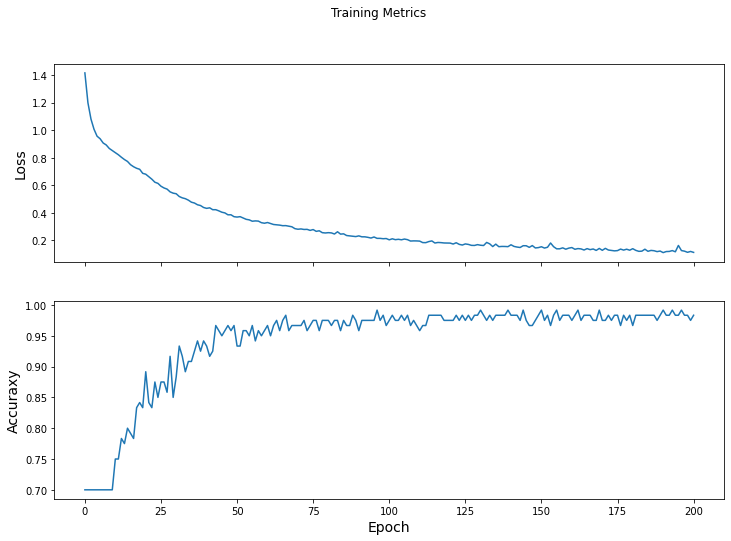

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuraxy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [26]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [27]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name="species",
    num_epochs=1,
    shuffle=False
)

test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print(f"Test set accuracy: {test_accuracy.result():.3%}")

Test set accuracy: 96.667%


In [29]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [30]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print(f"Example {i} prediction: {name} ({100*p:4.1f}%)")

Example 0 prediction: Iris setosa (97.2%)
Example 1 prediction: Iris versicolor (90.6%)
Example 2 prediction: Iris virginica (85.4%)
